In [3]:
from matplotlib import pyplot as plt
import numpy as np
from random import choice
import time
from IPython.display import clear_output
from time import sleep 
import math


clear_output(True)
#plt.clf()
#plt.setp(plt.gca(), autoscale_on=False)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

nrows, ncols = 4,4
image = np.zeros(nrows*ncols)
image[::2] = (nrows)
image = image.reshape((nrows,ncols))
row_labels = range(nrows)
col_labels = ["A", "B", "C", "D"]
print(image)
plt.matshow(image)
plt.yticks(range(nrows),row_labels)
plt.xticks(range(ncols),col_labels)
plt.show()

This ist at textsas

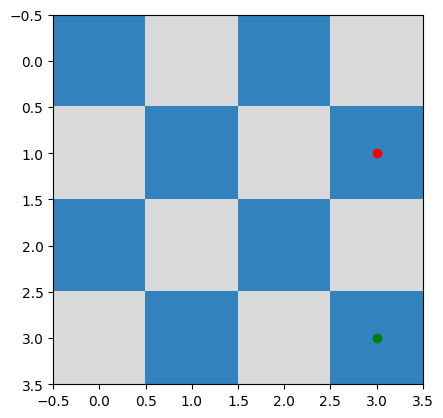

In [5]:
x = range(4)
y = range(4)
h,v = np.meshgrid(x,y)  #rect grid with vector coordinates (X,Y)
#min_max = np.min(x), np.max(x), np.min(y), np.max(y) 
res = np.add.outer(range(4), range(4))%2  # returns product of two vectors
positions=np.vstack([h.ravel(), v.ravel()]).T
start_position = choice(positions)
target_position = choice(positions)
possible_moves = [-1, 0, 1]

def draw_board():

    plt.xticks(minor=False)
    plt.yticks(minor=False)
    start_dot = plt.scatter(start_position[0],start_position[1],color="r")
    target_dot = plt.scatter(target_position[0],target_position[1],color="g")
    plt.imshow(res, cmap="tab20c")

if not np.array_equal(start_position,target_position):
    draw_board()


Target reached!
Steps: 11
[3, 1]
[3, 0]
[3, 1]
[3, 0]
[3, 1]
[3, 2]
[2, 2]
[2, 3]
[1, 3]
[2, 3]
[3, 3]


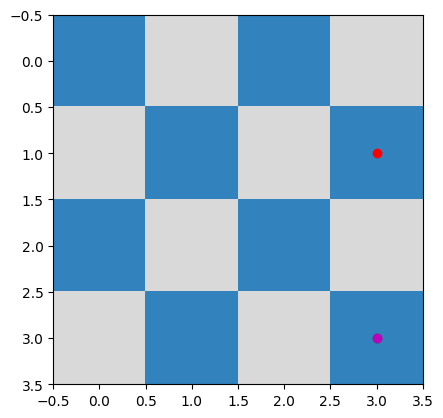

In [10]:
route = []
stepcounter = 0
route.append([start_position[0], start_position[1]])
newposx, newposy = 0, 0
while True:
    clear_output(True)
    draw_board()
    movex = choice(possible_moves)
    movey = choice(possible_moves)
    last_pos = route[-1]
    if movex == movey:
        continue
    else:
        if movex == 0 or movey == 0:
            newposx = last_pos[0] + movex
            newposy = last_pos[1] + movey
            if newposx >= 0 and newposx <= 3 and newposy >= 0 and newposy <= 3:
                # print(f"New pos: {newposx, newposy}")
                route.append([newposx, newposy])
                plt.scatter(newposx, newposy, color="m")
            if newposx == target_position[0] and newposy == target_position[1]:
                print("Target reached!")
                break
            stepcounter += 1
    sleep(1)
    plt.show()
print(f"Steps: {stepcounter}")
print(*route,sep="\n")


In [ ]:
# ttlist = [tuple(x) for x in route.reverse()]
# vals = [[ttlist[0],1]]
# ttlist.pop(0)
# q = 1
# reward = 0.9
# for x in ttlist:
#     vals.append([x,math.pow(reward,q)])
#     q+=1
# print("new list with rewardvalues")
# print(*vals,sep="\n")

In [33]:
testlist = [[1, 3], [1, 2], [1, 1], [1, 2], [2, 2], [2, 1], [3, 1], [2, 1], [2, 2], [2, 1], [2, 2], [1, 2], [2, 2], [3, 2]]
ttlist = [tuple(x) for x in testlist]
vals = [[ttlist[0],1]]
mult_reward_list = dict.fromkeys(ttlist)
print(mult_reward_list)
ttlist.pop(0)
q = 1
reward = 0.9
for x in ttlist:
    vals.append([x,round(math.pow(reward,q),2)])
    q+=1
print("new list with rewardvalues")
print(*vals,sep="\n")
mult_list = []
for x in vals:
    mrl_temp = mult_reward_list.get(x[0])
    if not mrl_temp:
        mult_reward_list[x[0]] = x[1]
    else:
        mult_reward_list[x[0]] = x[1] * mrl_temp
print(mult_reward_list)

{(1, 3): None, (1, 2): None, (1, 1): None, (2, 2): None, (2, 1): None, (3, 1): None, (3, 2): None}
new list with rewardvalues
[(1, 3), 1]
[(1, 2), 0.9]
[(1, 1), 0.81]
[(1, 2), 0.73]
[(2, 2), 0.66]
[(2, 1), 0.59]
[(3, 1), 0.53]
[(2, 1), 0.48]
[(2, 2), 0.43]
[(2, 1), 0.39]
[(2, 2), 0.35]
[(1, 2), 0.31]
[(2, 2), 0.28]
[(3, 2), 0.25]
{(1, 3): 1, (1, 2): 0.20367000000000002, (1, 1): 0.81, (2, 2): 0.027812399999999998, (2, 1): 0.11044799999999999, (3, 1): 0.53, (3, 2): 0.25}
